In [98]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.wkt import loads

sns.set_style('darkgrid')

In [94]:
largest = xr.open_dataset('../data/forcing_data/raw/TINs/narayani_cid10_largest_tin.nc')
globcov = pd.read_csv('../data/forcing_data/raw/GlobCov/land_type_glob_cov.csv',header=0, delimiter=';', usecols=[1,2], skiprows=1)
elev_profile = pd.read_csv('../data/elevation_profile/elevation_profile.csv', delimiter=';', header=0, skiprows=1, usecols=[1, 2])

In [99]:
elev_profile['lat'] = elev_profile['wkt_geom'].apply(lambda wkt: loads(wkt).y)

In [101]:
elev_profile

,wkt_geom,Value,lat
0,Point (84.82703167320323701 28.04988687838645944),600.166687,28.049887
1,Point (84.82702585976595344 28.05065580738686393),567.277771,28.050656
2,Point (84.82702004632866988 28.05142473638726486),536.250000,28.051425
3,Point (84.82701423289140052 28.05219366538766934),259.444458,28.052194
4,Point (84.82700841945411696 28.05296259438807027),576.694458,28.052963
...,...,...,...
997,Point (84.82123567623469285 28.81650909178820896),5116.000000,28.816509
998,Point (84.82122986279742349 28.81727802078861345),5161.416504,28.817278
999,Point (84.82122404936013993 28.81804694978901438),5211.972168,28.818047
1000,Point (84.82121823592285637 28.81881587878941886),5261.027832,28.818816


In [41]:
globcov_unique = globcov['DN'].unique()

In [42]:
area_list = []
for i in globcov_unique:
    area = globcov.loc[globcov['DN'] == i].sum()[1]
    area_list.append(area)

In [58]:
sum_all = np.sum(area_list)
# cropland: 11, 14, 20, 30
cropland = np.round(np.sum(area_list[0:4]) / sum_all *100, 2)
# Forest: 40, 50, 70, 100, 110, 120, 130
forest = np.round(np.sum(area_list[4:11]) / sum_all*100, 2)
# Herbaceous vegetation (grass, savanna): 140
herbaceous = np.round(np.sum(area_list[11:12]) / sum_all*100, 2)
# Sparse areas: 150, 200
sparse = np.round(np.sum(area_list[12:14]) / sum_all*100, 2)
# Water bodies: 210
water = np.round(area_list[14] / sum_all*100, 2)
# Permanent snow and ice: 220
snow_ice = np.round(area_list[15] / sum_all*100, 2)


In [179]:
water

0.04

<BarContainer object of 6 artists>

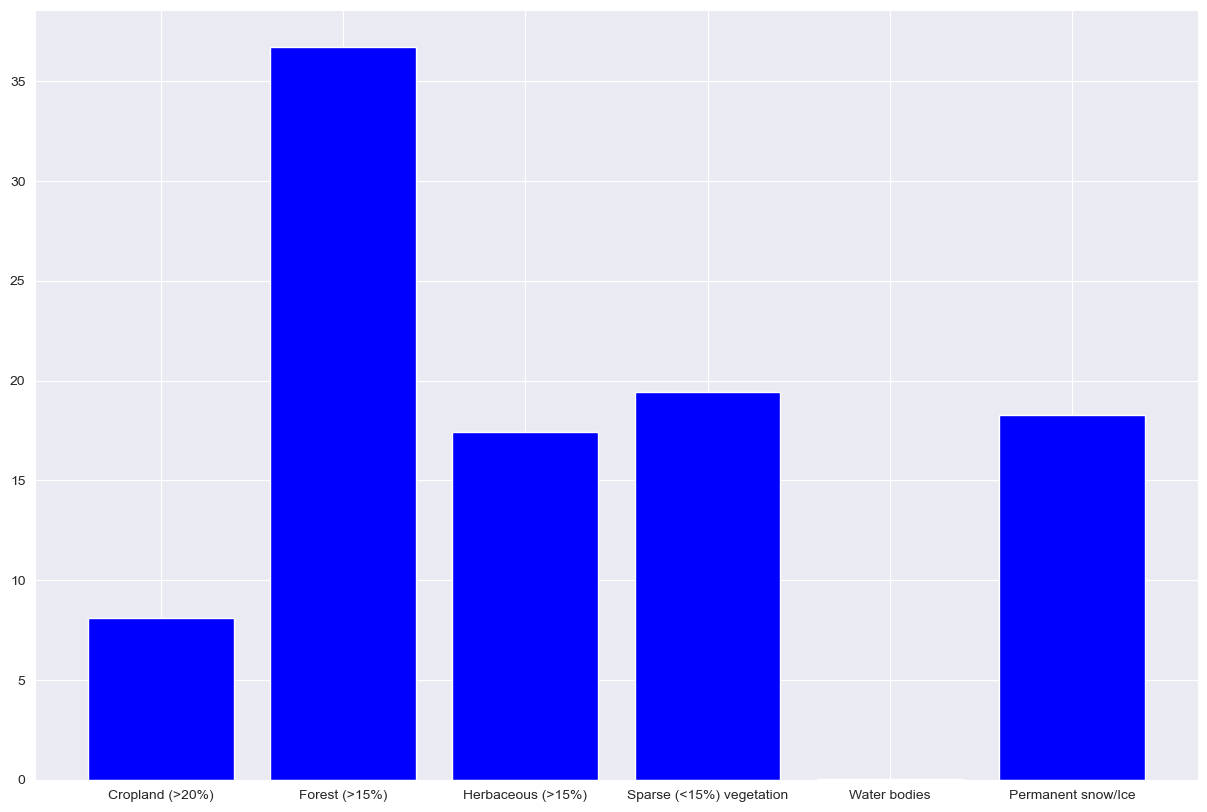

In [61]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.bar(['Cropland (>20%)', 'Forest (>15%)', 'Herbaceous (>15%)', 'Sparse (<15%) vegetation', 'Water bodies', 'Permanent snow/Ice'], [cropland, forest, herbaceous, sparse, water, snow_ice], color='blue')

In [27]:
globcov['Desc'] = 'Undefined'
for i in range(len(globcov)):
    if globcov['DN'][i] == 11:
        globcov.loc[i,'Desc'] = 'Post-flooding or irrigated croplands (or aquatic)'

array([ 11,  14,  20,  30,  40,  50,  70, 100, 110, 120, 130, 140, 150,
       200, 210, 220])

In [28]:
globcov

,fid,DN,Desc
0,1635,11,Post-flooding or irrigated croplands (or aquatic)
1,1957,11,Post-flooding or irrigated croplands (or aquatic)
2,2065,11,Post-flooding or irrigated croplands (or aquatic)
3,2069,11,Post-flooding or irrigated croplands (or aquatic)
4,2100,11,Post-flooding or irrigated croplands (or aquatic)
...,...,...,...
5640,4287,220,Undefined
5641,4308,220,Undefined
5642,4409,220,Undefined
5643,4411,220,Undefined


In [69]:
area_globcov = largest['area'].values
forest_fraction = largest['forest-fraction'].values
glacier_fraction = largest['glacier-fraction'].values
lake_fraction = largest['lake-fraction'].values
reservoir_fraction = largest['reservoir-fraction'].values

In [70]:
z = largest.z.values
area_largest = largest.area.values

In [73]:
# Sort data by elevation in ascending order
idx = np.argsort(z)
elevation = np.array(z)[idx]
area = np.array(area_largest)[idx]

In [129]:
cumulative_area = np.round((np.cumsum(area_largest) / np.sum(area_largest) * 100),2)

In [170]:
idx = 0
for i,v in enumerate(elevation):
    if v >= 6500:
        idx = i
        break

In [171]:
cumulative_area[idx]

99.09

In [173]:
100 - 99.09

0.9099999999999966

Text(0.5, 1.0, 'b) Land cover type distribution')

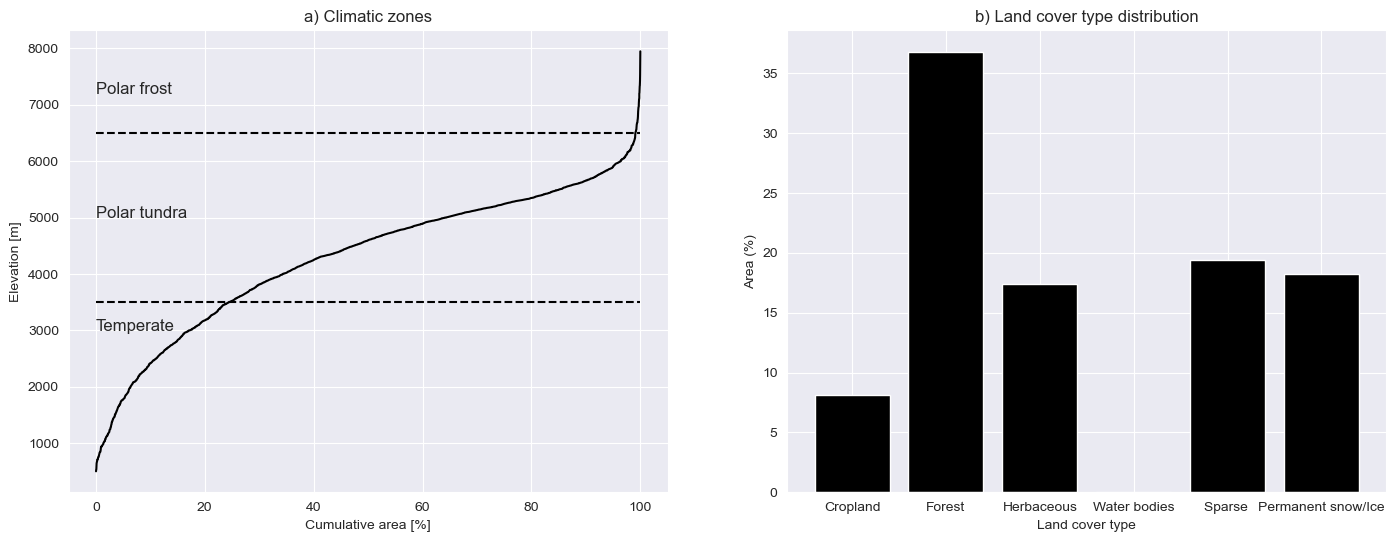

In [167]:
fig, ax = plt.subplots(1,2, figsize=(17, 6))

ax[0].plot(cumulative_area, elevation, color='black')
ax[0].set_xlabel('Cumulative area [%]')
ax[0].set_ylabel('Elevation [m]')
ax[0].hlines(3500,0,100, color = 'black', linestyle='--')
ax[0].hlines(6500,0,100, color = 'black', linestyle='--')

ax[0].text(0, 3000, 'Temperate', fontsize=12)
ax[0].text(0, 5000, 'Polar tundra', fontsize=12)
ax[0].text(0, 7200, 'Polar frost', fontsize=12)
ax[0].set_title('a) Climatic zones')

ax[1].bar(['Cropland', 'Forest', 'Herbaceous',  'Water bodies', 'Sparse ', 'Permanent snow/Ice'], [cropland, forest, herbaceous, water,  sparse, snow_ice], color='black')
ax[1].set_xlabel('Land cover type')
ax[1].set_ylabel('Area (%)')
ax[1].set_title('b) Land cover type distribution')

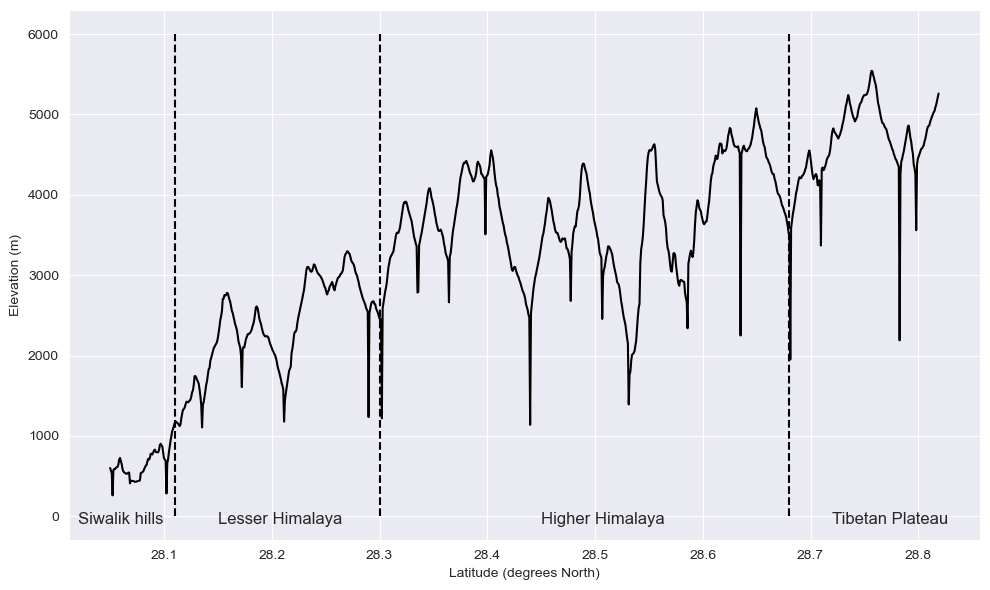

In [153]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(elev_profile['lat'], elev_profile['Value'], color='black')
ax.set_xlabel('Latitude (degrees North)')
ax.set_ylabel('Elevation (m)')
ax.vlines(28.3, 0,6000, color='black', linestyle='--')
ax.vlines(28.68, 0,6000, color='black', linestyle='--')
ax.vlines(28.11, 0,6000, color='black', linestyle='--')
ax.text(28.02, -100, 'Siwalik hills', fontsize=12)
ax.text(28.15, -100, 'Lesser Himalaya', fontsize=12)
ax.text(28.45, -100, 'Higher Himalaya', fontsize=12)
ax.text(28.72, -100, 'Tibetan Plateau', fontsize=12)

#ax.set_title('Latitudinal elevation profile of Budhi Gandaki catchment')
# ax[1].bar(['Cropland (>20%)', 'Forest (>15%)', 'Herbaceous (>15%)', 'Sparse (<15%) vegetation', 'Water bodies', 'Permanent snow/Ice'], [cropland, forest, herbaceous, sparse, water, snow_ice], color='black')
# ax[1].set_xlabel('Land cover type')
# ax[1].set_ylabel('Area (%)')
# ax[1].set_title('b) Land cover type distribution in Budhi Gandaki catchment')
fig.tight_layout()

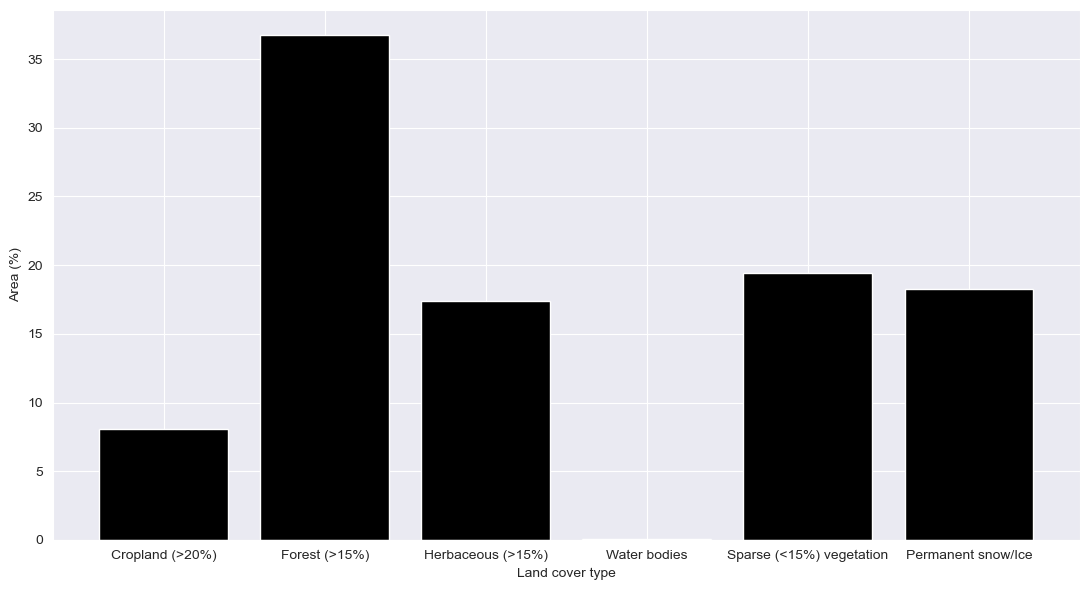

In [142]:
fig, ax = plt.subplots(figsize=(11, 6))

ax.bar(['Cropland (>20%)', 'Forest (>15%)', 'Herbaceous (>15%)',  'Water bodies', 'Sparse (<15%) vegetation', 'Permanent snow/Ice'], [cropland, forest, herbaceous, water,  sparse, snow_ice], color='black')
ax.set_xlabel('Land cover type')
ax.set_ylabel('Area (%)')
# ax[1].set_title('b) Land cover type distribution in Budhi Gandaki catchment')
fig.tight_layout()